![image](120724120148-traffic-deaths.jpg)

# Object Detection for Self-Driving Cars

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">About Data</p>

<div style="background-color:#d5eae9; padding:20px; font-size:15px">
    <strong>Dataset</strong> 
    <br>
    
This dataset is output photos of the camera installed on the car in different situtation

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('E:\Deep Learning\IMT\YOLO & SSD/labels_train.csv')
df

,frame,xmin,xmax,ymin,ymax,class_id
0,1478019952686311006.jpg,237,251,143,155,1
1,1478019952686311006.jpg,437,454,120,186,3
2,1478019953180167674.jpg,218,231,146,158,1
3,1478019953689774621.jpg,171,182,141,154,2
4,1478019953689774621.jpg,179,191,144,155,1
...,...,...,...,...,...,...
132401,1479506176491553178.jpg,166,186,139,156,1
132402,1479506176491553178.jpg,182,204,142,153,1
132403,1479506176491553178.jpg,239,261,139,155,1
132404,1479506176491553178.jpg,259,280,139,157,1


In [3]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 

In [4]:
check(df)

,column,dtypes,nunique,sum_null
0,frame,object,18000,0
1,xmin,int64,476,0
2,xmax,int64,477,0
3,ymin,int64,207,0
4,ymax,int64,285,0
5,class_id,int64,5,0


In [5]:
classes = df.class_id.unique()
print(classes)

[1 3 2 5 4]


In [6]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

In [7]:
# Get path images and boxes for each class_id
boxes = {}
images = {}

base_path = 'E:\Deep Learning\IMT\YOLO & SSD\images/'

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[14]
    
    images[class_id] = cv2.imread(base_path + first_row['frame'])
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

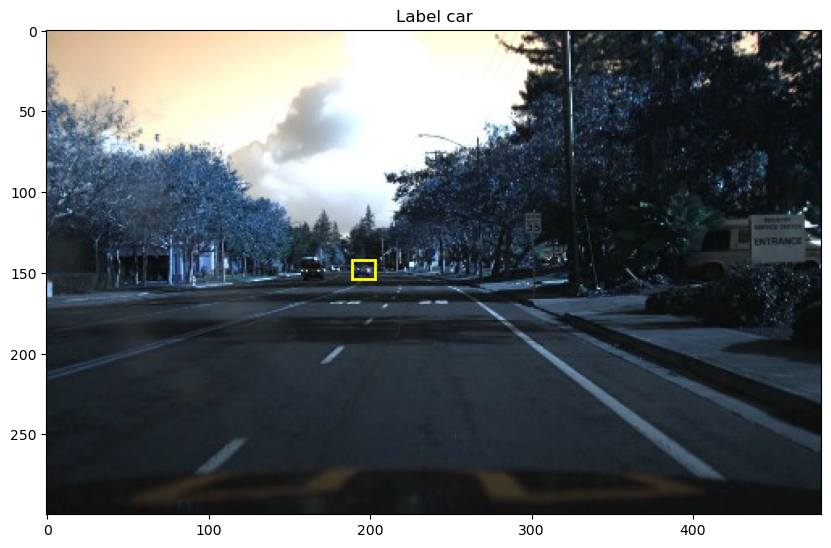

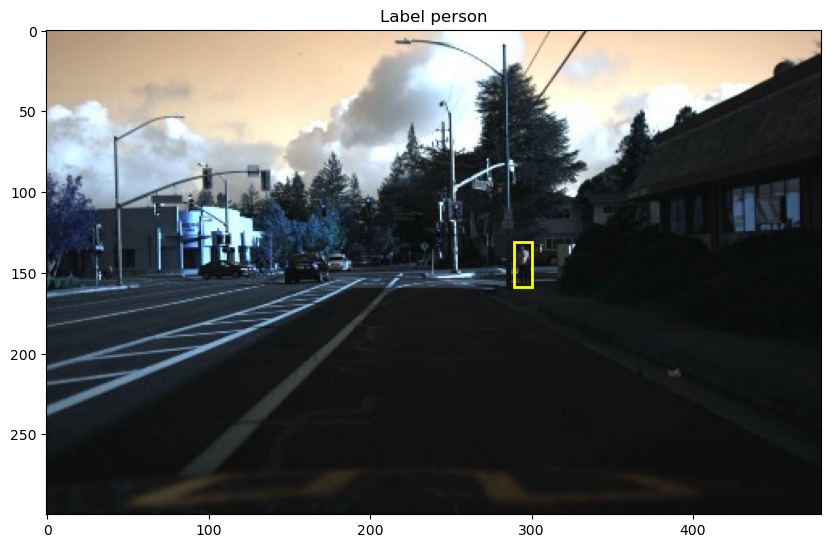

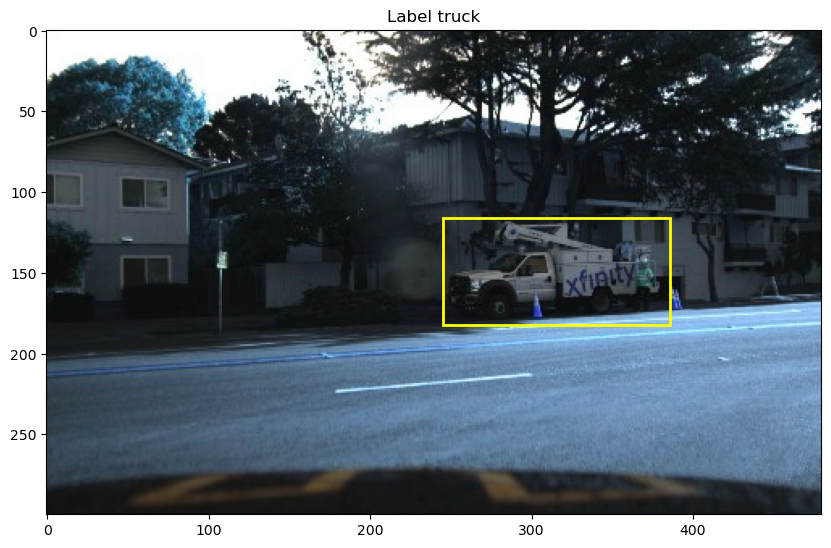

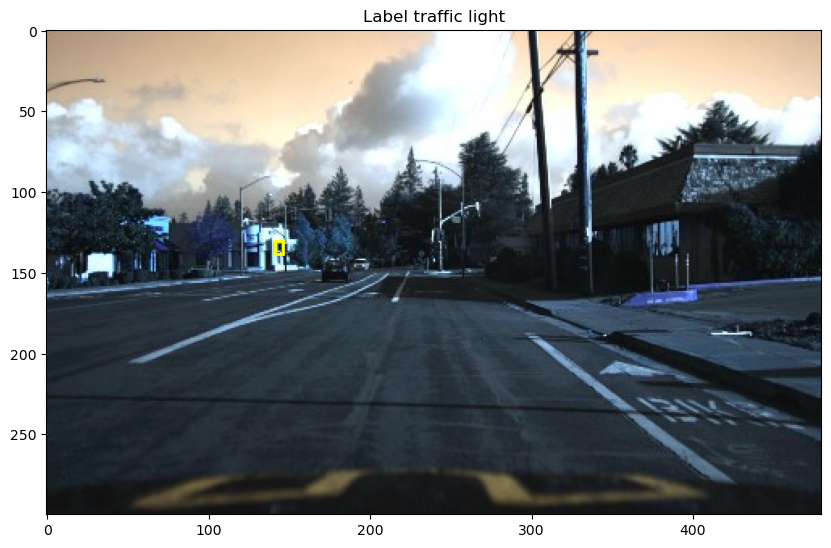

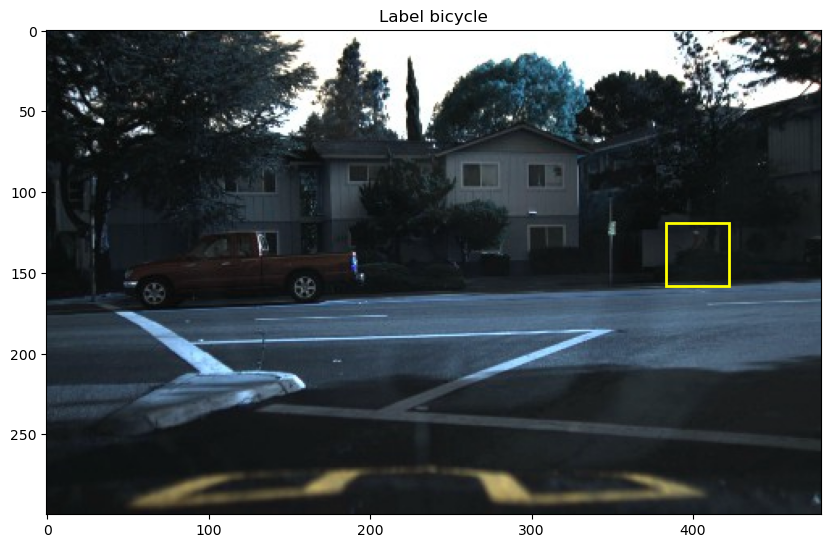

In [8]:
for i in classes:

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(10, 15))
    plt.title("Label " + labels[i])
    plt.imshow(images[i])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))
    
    plt.show()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">Modeling</p>

In [9]:
from ultralytics import YOLO
import PIL 
from PIL import Image
from IPython.display import display 

In [10]:
model = YOLO("yolov8m.pt")

In [11]:
results=model.predict(source="E:\Deep Learning\IMT\YOLO & SSD\images/1478897415103836779.jpg",
              save=True, conf=0.2,iou=0.5)


image 1/1 E:\Deep Learning\IMT\YOLO & SSD\images\1478897415103836779.jpg: 416x640 4 cars, 4 trucks, 719.8ms
Speed: 3.7ms preprocess, 719.8ms inference, 3.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2


In [12]:
result = results[0]
box = result.boxes[0]

In [13]:
for result in results:
    boxes = result.boxes  
    masks = result.masks  
    probs = result.probs  

In [14]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 7.0
Coordinates: [204.20297241210938, 92.87255859375, 346.5247497558594, 185.3618927001953]
Probability: 0.9322108030319214


In [15]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: truck
Coordinates: [204, 93, 347, 185]
Probability: 0.93
---
Object type: car
Coordinates: [26, 136, 190, 204]
Probability: 0.9
---
Object type: car
Coordinates: [0, 151, 72, 204]
Probability: 0.76
---
Object type: truck
Coordinates: [342, 138, 404, 174]
Probability: 0.63
---
Object type: car
Coordinates: [432, 147, 460, 169]
Probability: 0.61
---
Object type: car
Coordinates: [401, 149, 440, 174]
Probability: 0.48
---
Object type: truck
Coordinates: [401, 135, 443, 174]
Probability: 0.41
---
Object type: truck
Coordinates: [403, 136, 444, 153]
Probability: 0.25
---


In [16]:
results1 = model.predict(source="E:\Deep Learning\IMT\YOLO & SSD\images/1478898314885344714.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 E:\Deep Learning\IMT\YOLO & SSD\images\1478898314885344714.jpg: 416x640 4 persons, 5 cars, 7 traffic lights, 629.4ms
Speed: 4.0ms preprocess, 629.4ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2


In [17]:
results2 = model.predict(source="E:\Deep Learning\IMT\YOLO & SSD\images/1479504416352875380.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 E:\Deep Learning\IMT\YOLO & SSD\images\1479504416352875380.jpg: 416x640 7 cars, 1 truck, 1 traffic light, 622.5ms
Speed: 3.0ms preprocess, 622.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2


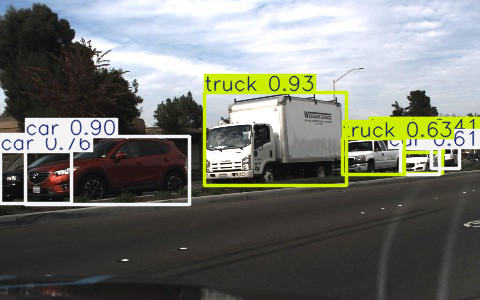

In [18]:
# Plotting results
plot = results[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

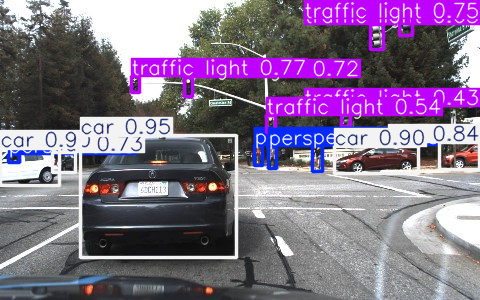

In [19]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

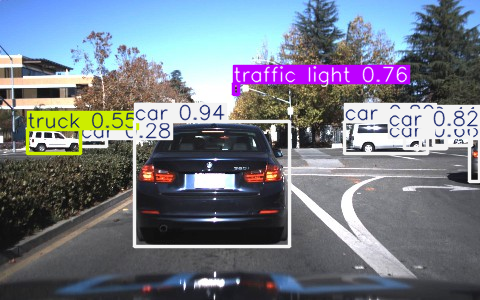

In [20]:
# Plotting results
plot = results2[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))